In [5]:
import time

def linear_probing(keys, table_size):
    hash_table = [None] * table_size

    for key in keys:
        index = key % table_size
        while hash_table[index] is not None:
            index = (index + 1) % table_size
        hash_table[index] = key

    return hash_table

def main():
    keys = list(map(int, input("Enter keys separated by spaces: ").split()))
    table_size = int(input("Enter size of hash table: "))
    
    start_time = time.time()
    result_hash_table = linear_probing(keys, table_size)
    end_time = time.time()
    execution_time = end_time - start_time

    print("Resultant Hash Table:")
    for i, key in enumerate(result_hash_table):
        print(f"{i}: {key}" if key is not None else f"{i}: ")

    print(f"Execution Time: {execution_time} seconds")

if __name__ == "__main__":
    main()


Enter keys separated by spaces:  12 18 13 2 3 23 5 15
Enter size of hash table: 10
Resultant Hash Table:
0: 
1: 
2: 12
3: 13
4: 2
5: 3
6: 23
7: 5
8: 18
9: 15
Execution Time: 0.0 seconds


In [ ]:
import time

TOMBSTONE = object()  # Define tombstone globally

def hash_table_with_tombstones(keys, table_size):
    hash_table = [None] * table_size

    for key in keys:
        index = key % table_size
        while hash_table[index] is not None and hash_table[index] != TOMBSTONE:
            index = (index + 1) % table_size
        hash_table[index] = key

    return hash_table

def search_hash_table(hash_table, key):
    table_size = len(hash_table)
    index = key % table_size

    while hash_table[index] is not None:
        if hash_table[index] == key:
            return index
        index = (index + 1) % table_size

    return -1

def main():
    keys = list(map(int, input("Enter keys separated by spaces: ").split()))
    table_size = int(input("Enter size of hash table: "))
    
    start_time = time.time()
    result_hash_table = hash_table_with_tombstones(keys, table_size)
    end_time = time.time()
    execution_time = end_time - start_time

    print("Resultant Hash Table:")
    for i, key in enumerate(result_hash_table):
        if key is not None:
            if key != TOMBSTONE:
                print(f"{i}: {key}")
            else:
                print(f"{i}: Tombstone")
        else:
            print(f"{i}: ")

    print(f"Execution Time: {execution_time} seconds")

    # Search for a key in the hash table
    search_key = int(input("Enter key to search: "))
    search_result = search_hash_table(result_hash_table, search_key)
    if search_result != -1:
        print(f"Key {search_key} found at index {search_result}.")
    else:
        print(f"Key {search_key} not found.")

if __name__ == "__main__":
    main()


In [ ]:
class HashTable:
    def __init__(self):
        self.size = 10
        self.table = [None]*self.size

    def hash_func(self, key):
        return key % self.size

    def insert(self, key):
        index = self.hash_func(key)
        while self.table[index] is not None:
            index = (index + 1) % self.size
        self.table[index] = key

keys = [12, 18, 13, 2, 3, 23, 5, 15]
hash_table = HashTable()
for key in keys:
    hash_table.insert(key)

print(hash_table.table)


In [ ]:
import time

TOMBSTONE = object()

def hash_table_with_tombstones(keys, table_size):
    hash_table = [None] * table_size

    for key in keys:
        index = key % table_size
        while hash_table[index] is not None and hash_table[index] != TOMBSTONE:
            index = (index + 1) % table_size
        hash_table[index] = key

    return hash_table

def main():
    keys = [12, 18, 13, 2, 3, 23, 5, 15]
    table_size = 10

    start_time = time.time()
    result_hash_table = hash_table_with_tombstones(keys, table_size)
    end_time = time.time()
    execution_time = end_time - start_time

    print("Resultant Hash Table:")
    for i, key in enumerate(result_hash_table):
        if key is not None:
            if key == TOMBSTONE:
                print(f"{i}: Tombstone")
            else:
                print(f"{i}: {key}")
        else:
            print(f"{i}: ")

    print(f"Execution Time: {execution_time} seconds")

if __name__ == "__main__":
    main()


In [7]:
# *******************************************************
# *                   Hash Table Builder                *
# *******************************************************

import time

# Linear probing implementation
def linear_probe_insert(table, key):
    index = key % len(table)
    while table[index] is not None:
        index = (index + 1) % len(table)
    table[index] = key

def linear_probe_search(table, key):
    index = key % len(table)
    comparisons = 1
    while table[index] is not None:
        if table[index] == key:
            return True, comparisons
        index = (index + 1) % len(table)
        comparisons += 1
    return False, comparisons

# Direct chaining implementation
def direct_chaining_insert(table, key):
    index = key % len(table)
    if table[index] is None:
        table[index] = [key]
    else:
        table[index].append(key)

def direct_chaining_search(table, key):
    index = key % len(table)
    comparisons = 1
    if table[index] is not None:
        if key in table[index]:
            return True, comparisons
    return False, comparisons

# Taking input from user
keys = list(map(int, input("Enter keys separated by spaces: ").split()))

# Initialize hash tables
linear_probe_table = [None] * 10
direct_chaining_table = [None] * 10

# Insert keys into hash tables and calculate time
start_time = time.time()
for key in keys:
    linear_probe_insert(linear_probe_table, key)
end_time = time.time()
linear_probe_execution_time = end_time - start_time

start_time = time.time()
for key in keys:
    direct_chaining_insert(direct_chaining_table, key)
end_time = time.time()
direct_chaining_execution_time = end_time - start_time

# Display hash tables
print("*******************************************************")
print("*               Linear Probing Hash Table              *")
print("*******************************************************")
print(linear_probe_table)
print("\n*******************************************************")
print("*            Direct Chaining Hash Table               *")
print("*******************************************************")
print(direct_chaining_table)

# Calculate load factor
load_factor_linear = sum(1 for entry in linear_probe_table if entry is not None) / len(linear_probe_table)
load_factor_direct = sum(1 for entry in direct_chaining_table if entry is not None) / len(direct_chaining_table)
print("\nLoad Factor for Linear Probing:", load_factor_linear)
print("Load Factor for Direct Chaining:", load_factor_direct)

# Search for keys in hash tables and calculate time
search_key = int(input("\nEnter key to search: "))

start_time = time.time()
linear_probe_result, linear_probe_comparisons = linear_probe_search(linear_probe_table, search_key)
end_time = time.time()
linear_probe_search_time = end_time - start_time

start_time = time.time()
direct_chaining_result, direct_chaining_comparisons = direct_chaining_search(direct_chaining_table, search_key)
end_time = time.time()
direct_chaining_search_time = end_time - start_time

print("\n*******************************************************")
print("*               Linear Probing Search                  *")
print("*******************************************************")
print("Search Result for key", search_key, ":", linear_probe_result)
print("Comparisons made in Linear Probing:", linear_probe_comparisons)
print("Time taken for Linear Probing search:", linear_probe_search_time, "seconds")

print("\n*******************************************************")
print("*               Direct Chaining Search                 *")
print("*******************************************************")
print("Search Result for key", search_key, ":", direct_chaining_result)
print("Comparisons made in Direct Chaining:", direct_chaining_comparisons)
print("Time taken for Direct Chaining search:", direct_chaining_search_time, "seconds")

print("\n*******************************************************")
print("*             Execution Time for Building              *")
print("*******************************************************")
print("Time taken for Linear Probing hash table building:", linear_probe_execution_time, "seconds")
print("Time taken for Direct Chaining hash table building:", direct_chaining_execution_time, "seconds")


Enter keys separated by spaces: 12 18 13 2 3 23 5 15
*******************************************************
*               Linear Probing Hash Table              *
*******************************************************
[None, None, 12, 13, 2, 3, 23, 5, 18, 15]

*******************************************************
*            Direct Chaining Hash Table               *
*******************************************************
[None, None, [12, 2], [13, 3, 23], None, [5, 15], None, None, [18], None]

Load Factor for Linear Probing: 0.8
Load Factor for Direct Chaining: 0.4

Enter key to search: 12

*******************************************************
*               Linear Probing Search                  *
*******************************************************
Search Result for key 12 : True
Comparisons made in Linear Probing: 1
Time taken for Linear Probing search: 0.0 seconds

*******************************************************
*               Direct Chaining Search         

In [8]:
import time

# Linear probing implementation
def linear_probe_insert(table, key):
    index = key % len(table)
    while table[index] is not None:
        index = (index + 1) % len(table)
    table[index] = key

def linear_probe_search(table, key):
    index = key % len(table)
    comparisons = 1
    while table[index] is not None:
        if table[index] == key:
            return True, comparisons
        index = (index + 1) % len(table)
        comparisons += 1
    return False, comparisons

# Direct chaining implementation
def direct_chaining_insert(table, key):
    index = key % len(table)
    if table[index] is None:
        table[index] = [key]
    else:
        table[index].append(key)

def direct_chaining_search(table, key):
    index = key % len(table)
    comparisons = 1
    if table[index] is not None:
        if key in table[index]:
            return True, comparisons
    return False, comparisons

# Function to display separators
def display_separator(symbol, length):
    print(symbol * length)

# Function to display header
def display_header(header_text):
    print(header_text)
    print()

# Function to display execution time
def display_execution_time(execution_time):
    print("Execution Time:", execution_time, "seconds")

# Function to calculate load factor
def calculate_load_factor(hash_table):
    return sum(1 for entry in hash_table if entry is not None) / len(hash_table)

# Taking input from user
display_separator("*", 50)
display_header("Enter keys separated by spaces:")
keys = list(map(int, input().split()))

# Initialize hash tables
linear_probe_table = [None] * 10
direct_chaining_table = [None] * 10

# Linear probing hash table building
start_time = time.time()
for key in keys:
    linear_probe_insert(linear_probe_table, key)
end_time = time.time()
linear_probe_execution_time = end_time - start_time

# Direct chaining hash table building
start_time = time.time()
for key in keys:
    direct_chaining_insert(direct_chaining_table, key)
end_time = time.time()
direct_chaining_execution_time = end_time - start_time

# Display hash tables and load factor
display_separator("*", 50)
display_header("Linear Probing Hash Table:")
print(linear_probe_table)
print("Load Factor for Linear Probing:", calculate_load_factor(linear_probe_table))
display_execution_time(linear_probe_execution_time)

display_separator("*", 50)
display_header("Direct Chaining Hash Table:")
print(direct_chaining_table)
print("Load Factor for Direct Chaining:", calculate_load_factor(direct_chaining_table))
display_execution_time(direct_chaining_execution_time)

# Search for keys in hash tables
display_separator("*", 50)
search_key = int(input("Enter key to search: "))

# Linear probing search
start_time = time.time()
linear_probe_result, linear_probe_comparisons = linear_probe_search(linear_probe_table, search_key)
end_time = time.time()
linear_probe_search_time = end_time - start_time

# Direct chaining search
start_time = time.time()
direct_chaining_result, direct_chaining_comparisons = direct_chaining_search(direct_chaining_table, search_key)
end_time = time.time()
direct_chaining_search_time = end_time - start_time

# Display search results and time
display_separator("*", 50)
print("Linear Probing Search Result for key", search_key, ":", linear_probe_result)
print("Comparisons made in Linear Probing:", linear_probe_comparisons)
display_execution_time(linear_probe_search_time)

print("Direct Chaining Search Result for key", search_key, ":", direct_chaining_result)
print("Comparisons made in Direct Chaining:", direct_chaining_comparisons)
display_execution_time(direct_chaining_search_time)


**************************************************
Enter keys separated by spaces:

12 18 13 2 3 23 5 15
**************************************************
Linear Probing Hash Table:

[None, None, 12, 13, 2, 3, 23, 5, 18, 15]
Load Factor for Linear Probing: 0.8
Execution Time: 0.0 seconds
**************************************************
Direct Chaining Hash Table:

[None, None, [12, 2], [13, 3, 23], None, [5, 15], None, None, [18], None]
Load Factor for Direct Chaining: 0.4
Execution Time: 0.0 seconds
**************************************************
Enter key to search: 12
**************************************************
Linear Probing Search Result for key 12 : True
Comparisons made in Linear Probing: 1
Execution Time: 7.43865966796875e-05 seconds
Direct Chaining Search Result for key 12 : True
Comparisons made in Direct Chaining: 1
Execution Time: 0.0 seconds


In [9]:
import time

# Linear probing implementation
def linear_probe_insert(table, key):
    index = key % len(table)
    while table[index] is not None:
        index = (index + 1) % len(table)
    table[index] = key

def linear_probe_search(table, key):
    index = key % len(table)
    comparisons = 1
    while table[index] is not None:
        if table[index] == key:
            return True, comparisons
        index = (index + 1) % len(table)
        comparisons += 1
    return False, comparisons

# Direct chaining implementation
def direct_chaining_insert(table, key):
    index = key % len(table)
    if table[index] is None:
        table[index] = [key]
    else:
        table[index].append(key)

def direct_chaining_search(table, key):
    index = key % len(table)
    comparisons = 1
    if table[index] is not None:
        if key in table[index]:
            return True, comparisons
    return False, comparisons

# Function to display separators
def display_separator(symbol, length):
    print(symbol * length)

# Function to display header
def display_header(header_text):
    print("\n" + "="*50)
    print(header_text)
    print("="*50)

# Function to display execution time
def display_execution_time(execution_time):
    print("\n" + "-"*50)
    print("Execution Time:", execution_time, "seconds")

# Function to calculate load factor
def calculate_load_factor(hash_table):
    return sum(1 for entry in hash_table if entry is not None) / len(hash_table)

# Taking input from user
display_separator("*", 50)
display_header("Enter keys separated by spaces:")
keys = list(map(int, input().split()))

# Initialize hash tables
linear_probe_table = [None] * 10
direct_chaining_table = [None] * 10

# Linear probing hash table building
display_separator("*", 50)
display_header("Building Linear Probing Hash Table:")
start_time = time.time()
for key in keys:
    linear_probe_insert(linear_probe_table, key)
end_time = time.time()
linear_probe_execution_time = end_time - start_time
display_execution_time(linear_probe_execution_time)

# Direct chaining hash table building
display_separator("*", 50)
display_header("Building Direct Chaining Hash Table:")
start_time = time.time()
for key in keys:
    direct_chaining_insert(direct_chaining_table, key)
end_time = time.time()
direct_chaining_execution_time = end_time - start_time
display_execution_time(direct_chaining_execution_time)

# Display hash tables and load factor
display_separator("*", 50)
display_header("Linear Probing Hash Table:")
print(linear_probe_table)
print("Load Factor for Linear Probing:", calculate_load_factor(linear_probe_table))

display_separator("*", 50)
display_header("Direct Chaining Hash Table:")
print(direct_chaining_table)
print("Load Factor for Direct Chaining:", calculate_load_factor(direct_chaining_table))

# Search for keys in hash tables
display_separator("*", 50)
search_key = int(input("Enter key to search: "))

# Linear probing search
display_separator("*", 50)
display_header("Linear Probing Search:")
start_time = time.time()
linear_probe_result, linear_probe_comparisons = linear_probe_search(linear_probe_table, search_key)
end_time = time.time()
linear_probe_search_time = end_time - start_time
print("Result for key", search_key, ":", linear_probe_result)
print("Comparisons made:", linear_probe_comparisons)
display_execution_time(linear_probe_search_time)

# Direct chaining search
display_separator("*", 50)
display_header("Direct Chaining Search:")
start_time = time.time()
direct_chaining_result, direct_chaining_comparisons = direct_chaining_search(direct_chaining_table, search_key)
end_time = time.time()
direct_chaining_search_time = end_time - start_time
print("Result for key", search_key, ":", direct_chaining_result)
print("Comparisons made:", direct_chaining_comparisons)
display_execution_time(direct_chaining_search_time)


**************************************************

Enter keys separated by spaces:
12 18 13 2 3 23 5 15
**************************************************

Building Linear Probing Hash Table:

--------------------------------------------------
Execution Time: 0.0 seconds
**************************************************

Building Direct Chaining Hash Table:

--------------------------------------------------
Execution Time: 0.0 seconds
**************************************************

Linear Probing Hash Table:
[None, None, 12, 13, 2, 3, 23, 5, 18, 15]
Load Factor for Linear Probing: 0.8
**************************************************

Direct Chaining Hash Table:
[None, None, [12, 2], [13, 3, 23], None, [5, 15], None, None, [18], None]
Load Factor for Direct Chaining: 0.4
**************************************************
Enter key to search: 23
**************************************************

Linear Probing Search:
Result for key 23 : True
Comparisons made: 4

--------------

In [1]:
class LinearProbingHashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size

    def hash_function(self, key):
        return key % self.size

    def insert(self, key):
        index = self.hash_function(key)
        while self.table[index] is not None:
            index = (index + 1) % self.size
        self.table[index] = key

    def search(self, key):
        index = self.hash_function(key)
        comparisons = 1
        while self.table[index] is not None:
            if self.table[index] == key:
                return True, comparisons
            index = (index + 1) % self.size
            comparisons += 1
        return False, comparisons

# Example usage:
hash_table = LinearProbingHashTable(10)
keys = [12, 18, 13, 2, 3, 23, 5, 15]
for key in keys:
    hash_table.insert(key)
print(hash_table.table)
print(hash_table.search(23))


[None, None, 12, 13, 2, 3, 23, 5, 18, 15]
(True, 4)


In [2]:
class DirectChainingHashTable:
    def __init__(self, size):
        self.size = size
        self.table = [[] for _ in range(size)]

    def hash_function(self, key):
        return key % self.size

    def insert(self, key):
        index = self.hash_function(key)
        self.table[index].append(key)

    def search(self, key):
        index = self.hash_function(key)
        comparisons = 1
        if key in self.table[index]:
            return True, comparisons
        else:
            return False, comparisons

# Example usage:
hash_table = DirectChainingHashTable(10)
keys = [12, 18, 13, 2, 3, 23, 5, 15]
for key in keys:
    hash_table.insert(key)
print(hash_table.table)
print(hash_table.search(23))


[[], [], [12, 2], [13, 3, 23], [], [5, 15], [], [], [18], []]
(True, 1)


In [8]:
import time

# Linear probing implementation
def linear_probe_insert(table, key):
    index = key % len(table)
    while table[index] is not None:
        index = (index + 1) % len(table)
    table[index] = key

def linear_probe_search(table, key):
    index = key % len(table)
    comparisons = 1
    while table[index] is not None:
        if table[index] == key:
            return True, comparisons
        index = (index + 1) % len(table)
        comparisons += 1
    return False, comparisons

# Direct chaining implementation
def direct_chaining_insert(table, key):
    index = key % len(table)
    if table[index] is None:
        table[index] = [key]
    else:
        table[index].append(key)

def direct_chaining_search(table, key):
    index = key % len(table)
    comparisons = 1
    if table[index] is not None:
        if key in table[index]:
            return True, comparisons
    return False, comparisons

# Function to display separators
def display_separator(symbol, length):
    print(symbol * length)

# Function to display header
def display_header(header_text):
    print("\n" + "="*50)
    print(header_text)
    print("="*50)

# Function to display execution time
def display_execution_time(execution_time):
    print("\n" + "-"*50)
    print("Execution Time:", execution_time, "seconds")

# Function to calculate load factor for linear probing
def calculate_load_factor_linear_probing(hash_table):
    total_keys = sum(1 for entry in hash_table if entry is not None)
    return total_keys / len(hash_table)

# Function to calculate load factor for direct chaining
def calculate_load_factor_direct_chaining(hash_table):
    total_keys = sum(len(entry) if entry is not None else 0 for entry in hash_table)
    return total_keys / len(hash_table)

# Taking input from user
display_separator("*", 50)
display_header("Enter keys separated by spaces:")
keys = list(map(int, input().split()))

# Initialize hash tables
linear_probe_table = [None] * 10
direct_chaining_table = [None] * 10

# Linear probing hash table building
display_separator("*", 50)
display_header("Building Linear Probing Hash Table:")
start_time = time.time()
for key in keys:
    linear_probe_insert(linear_probe_table, key)
end_time = time.time()
linear_probe_execution_time = end_time - start_time
display_execution_time(linear_probe_execution_time)

# Direct chaining hash table building
display_separator("*", 50)
display_header("Building Direct Chaining Hash Table:")
start_time = time.time()
for key in keys:
    direct_chaining_insert(direct_chaining_table, key)
end_time = time.time()
direct_chaining_execution_time = end_time - start_time
display_execution_time(direct_chaining_execution_time)

# Display hash tables and load factor
display_separator("*", 50)
display_header("Linear Probing Hash Table:")
print(linear_probe_table)
print("Load Factor for Linear Probing:", calculate_load_factor_linear_probing(linear_probe_table))

display_separator("*", 50)
display_header("Direct Chaining Hash Table:")
print(direct_chaining_table)
print("Load Factor for Direct Chaining:", calculate_load_factor_direct_chaining(direct_chaining_table))

# Search for keys in hash tables
display_separator("*", 50)
search_key = int(input("Enter key to search: "))

# Linear probing search
display_separator("*", 50)
display_header("Linear Probing Search:")
start_time = time.time()
linear_probe_result, linear_probe_comparisons = linear_probe_search(linear_probe_table, search_key)
end_time = time.time()
linear_probe_search_time = end_time - start_time
print("Result for key", search_key, ":", linear_probe_result)
print("Comparisons made:", linear_probe_comparisons)
display_execution_time(linear_probe_search_time)

# Direct chaining search
display_separator("*", 50)
display_header("Direct Chaining Search:")
start_time = time.time()
direct_chaining_result, direct_chaining_comparisons = direct_chaining_search(direct_chaining_table, search_key)
end_time = time.time()
direct_chaining_search_time = end_time - start_time
print("Result for key", search_key, ":", direct_chaining_result)
print("Comparisons made:", direct_chaining_comparisons)
display_execution_time(direct_chaining_search_time)


**************************************************

Enter keys separated by spaces:
12 18 13 2 3 23 5 15
**************************************************

Building Linear Probing Hash Table:

--------------------------------------------------
Execution Time: 0.0 seconds
**************************************************

Building Direct Chaining Hash Table:

--------------------------------------------------
Execution Time: 0.0 seconds
**************************************************

Linear Probing Hash Table:
[None, None, 12, 13, 2, 3, 23, 5, 18, 15]
Load Factor for Linear Probing: 0.8
**************************************************

Direct Chaining Hash Table:
[None, None, [12, 2], [13, 3, 23], None, [5, 15], None, None, [18], None]
Load Factor for Direct Chaining: 0.8
**************************************************
Enter key to search: 12
**************************************************

Linear Probing Search:
Result for key 12 : True
Comparisons made: 1

--------------

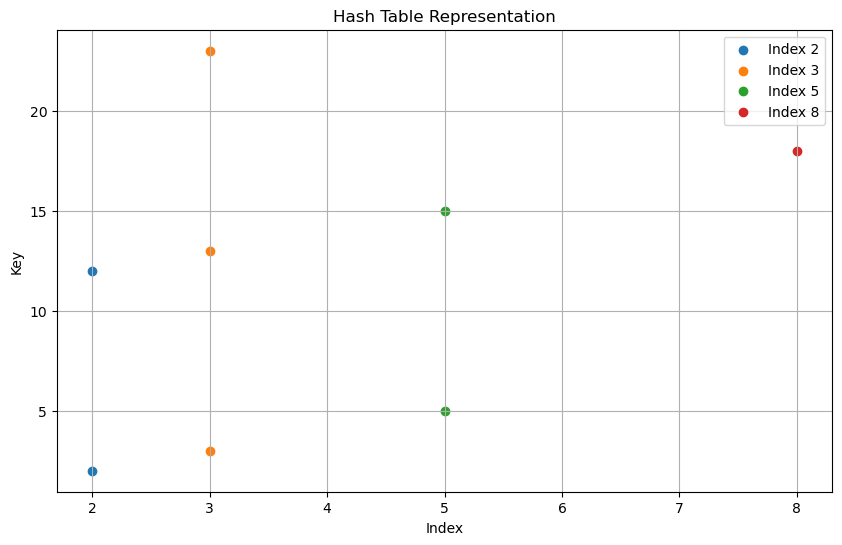

In [9]:
import matplotlib.pyplot as plt

# List of keys
keys = [12, 18, 13, 2, 3, 23, 5, 15]

# List of indices for keys
indices = [key % 10 for key in keys]

# Initialize a dictionary to track keys in each index
hash_table = {index: [] for index in range(10)}

# Populate the hash table with keys
for key, index in zip(keys, indices):
    hash_table[index].append(key)

# Plotting the hash table representation
plt.figure(figsize=(10, 6))
for index, key_list in hash_table.items():
    if key_list:
        plt.scatter([index]*len(key_list), key_list, label=f'Index {index}')
plt.xlabel('Index')
plt.ylabel('Key')
plt.title('Hash Table Representation')
plt.legend()
plt.grid(True)
plt.show()


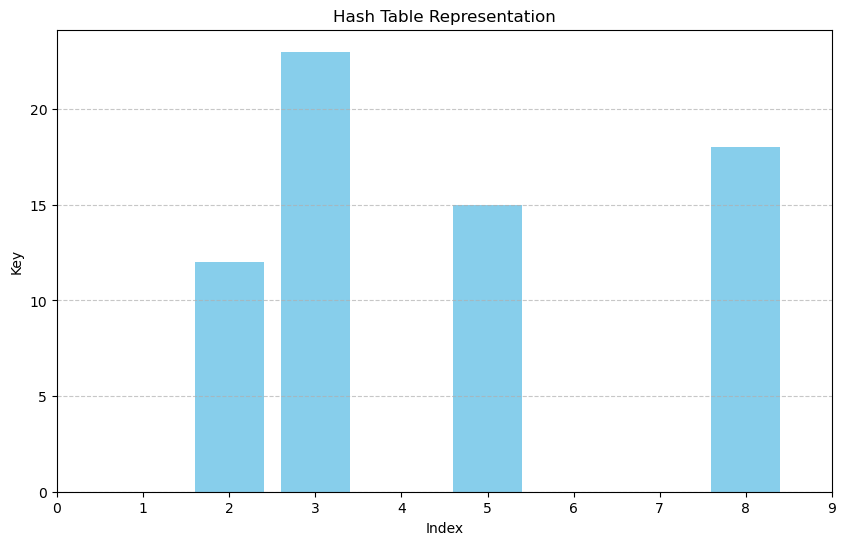

In [7]:
import matplotlib.pyplot as plt

keys = [12, 18, 13, 2, 3, 23, 5, 15]
indices = [key % 10 for key in keys]

plt.figure(figsize=(10, 6))
plt.bar(indices, keys, color='skyblue')
plt.xlabel('Index')
plt.ylabel('Key')
plt.title('Hash Table Representation')
plt.xticks(range(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [2]:
import time

# Linear probing implementation
def linear_probe_insert(table, key):
    index = key % len(table)
    while table[index] is not None:
        index = (index + 1) % len(table)
    table[index] = key

def linear_probe_search(table, key):
    index = key % len(table)
    comparisons = 1
    while table[index] is not None:
        if table[index] == key:
            return True, comparisons
        index = (index + 1) % len(table)
        comparisons += 1
    return False, comparisons

def linear_probe_delete(table, key):
    index = key % len(table)
    comparisons = 1
    while table[index] is not None:
        if table[index] == key:
            table[index] = None
            return True, comparisons
        index = (index + 1) % len(table)
        comparisons += 1
    return False, comparisons

# Direct chaining implementation
def direct_chaining_insert(table, key):
    index = key % len(table)
    if table[index] is None:
        table[index] = [key]
    else:
        table[index].append(key)

def direct_chaining_search(table, key):
    index = key % len(table)
    comparisons = 1
    if table[index] is not None:
        if key in table[index]:
            return True, comparisons
    return False, comparisons

def direct_chaining_delete(table, key):
    index = key % len(table)
    comparisons = 1
    if table[index] is not None:
        if key in table[index]:
            table[index].remove(key)
            if len(table[index]) == 0:
                table[index] = None
            return True, comparisons
    return False, comparisons

# Function to display separators
def display_separator(symbol, length):
    print(symbol * length)

# Function to display header
def display_header(header_text):
    print("\n" + "="*50)
    print(header_text)
    print("="*50)

# Function to display execution time
def display_execution_time(execution_time):
    print("\n" + "-"*50)
    print("Execution Time:", execution_time, "seconds")
    
# Function to calculate load factor for linear probing
def calculate_load_factor_linear_probing(hash_table):
    total_keys = sum(1 for entry in hash_table if entry is not None)
    return total_keys / len(hash_table)

# Function to calculate load factor for direct chaining
def calculate_load_factor_direct_chaining(hash_table):
    total_keys = sum(len(entry) if entry is not None else 0 for entry in hash_table)
    return total_keys / len(hash_table)

# Taking input from user
display_separator("*", 50)
display_header("Enter keys separated by spaces:")
keys = list(map(int, input().split()))

# Initialize hash tables
linear_probe_table = [None] * 10
direct_chaining_table = [None] * 10

# Linear probing hash table building
display_separator("*", 50)
display_header("Building Linear Probing Hash Table:")
start_time = time.time()
for key in keys:
    linear_probe_insert(linear_probe_table, key)
end_time = time.time()
linear_probe_execution_time = end_time - start_time
display_execution_time(linear_probe_execution_time)

# Direct chaining hash table building
display_separator("*", 50)
display_header("Building Direct Chaining Hash Table:")
start_time = time.time()
for key in keys:
    direct_chaining_insert(direct_chaining_table, key)
end_time = time.time()
direct_chaining_execution_time = end_time - start_time
display_execution_time(direct_chaining_execution_time)

# Display hash tables and load factor
display_separator("*", 50)
display_header("Linear Probing Hash Table:")
print(linear_probe_table)
print("Load Factor for Linear Probing:", calculate_load_factor_linear_probing(linear_probe_table))

display_separator("*", 50)
display_header("Direct Chaining Hash Table:")
print(direct_chaining_table)
print("Load Factor for Direct Chaining:", calculate_load_factor_direct_chaining(direct_chaining_table))

# Search for keys in hash tables
display_separator("*", 50)
search_key = int(input("Enter key to search: "))

# Linear probing search
display_separator("*", 50)
display_header("Linear Probing Search:")
start_time = time.time()
linear_probe_result, linear_probe_comparisons = linear_probe_search(linear_probe_table, search_key)
end_time = time.time()
linear_probe_search_time = end_time - start_time
print("Result for key", search_key, ":", linear_probe_result)
print("Comparisons made:", linear_probe_comparisons)
display_execution_time(linear_probe_search_time)

# Direct chaining search
display_separator("*", 50)
display_header("Direct Chaining Search:")
start_time = time.time()
direct_chaining_result, direct_chaining_comparisons = direct_chaining_search(direct_chaining_table, search_key)
end_time = time.time()
direct_chaining_search_time = end_time - start_time
print("Result for key", search_key, ":", direct_chaining_result)
print("Comparisons made:", direct_chaining_comparisons)
display_execution_time(direct_chaining_search_time)

# Delete key from hash tables
display_separator("*", 50)
delete_key = int(input("Enter key to delete: "))

# Linear probing deletion
display_separator("*", 50)
display_header("Linear Probing Deletion:")
start_time = time.time()
linear_probe_delete(linear_probe_table, delete_key)
end_time = time.time()
linear_probe_delete_time = end_time - start_time
print("Key", delete_key, "deleted from Linear Probing Hash Table.")
display_execution_time(linear_probe_delete_time)

# Direct chaining deletion
display_separator("*", 50)
display_header("Direct Chaining Deletion:")
start_time = time.time()
direct_chaining_delete(direct_chaining_table, delete_key)
end_time = time.time()
direct_chaining_delete_time = end_time - start_time
print("Key", delete_key, "deleted from Direct Chaining Hash Table.")
display_execution_time(direct_chaining_delete_time)

# Display updated hash tables
display_separator("*", 50)
display_header("Updated Linear Probing Hash Table:")
print(linear_probe_table)

display_separator("*", 50)
display_header("Updated Direct Chaining Hash Table:")
print(direct_chaining_table)


**************************************************

Enter keys separated by spaces:
12 18 13 2 3 23 5 15
**************************************************

Building Linear Probing Hash Table:

--------------------------------------------------
Execution Time: 0.0 seconds
**************************************************

Building Direct Chaining Hash Table:

--------------------------------------------------
Execution Time: 0.0 seconds
**************************************************

Linear Probing Hash Table:
[None, None, 12, 13, 2, 3, 23, 5, 18, 15]
Load Factor for Linear Probing: 0.8
**************************************************

Direct Chaining Hash Table:
[None, None, [12, 2], [13, 3, 23], None, [5, 15], None, None, [18], None]
Load Factor for Direct Chaining: 0.8
**************************************************
Enter key to search: 12
**************************************************

Linear Probing Search:
Result for key 12 : True
Comparisons made: 1

--------------

In [9]:
# Function to mark a cell as tombstone
def mark_tombstone(table, index):
    table[index] = "Tombstone"

# Function to insert a key into the hash table
def insert_with_tombstones(table, key):
    index = key % len(table)
    while table[index] is not None and table[index] != "Tombstone":
        index = (index + 1) % len(table)
    table[index] = key

# Function to search for a key in the hash table
def search_with_tombstones(table, key):
    index = key % len(table)
    while table[index] is not None:
        if table[index] == key:
            return True
        index = (index + 1) % len(table)
    return False

# Explanation:
# When a tombstone is encountered during search, it indicates that a record was deleted from that position.
# However, there could still be valid records further along the probe sequence.
# Therefore, the search cannot conclude that the record is not in the table until an empty cell is found,
# indicating that the entire probe sequence has been searched.

# Sample usage:
hash_table = [None] * 10  # Initialize hash table
insert_with_tombstones(hash_table, 12)
insert_with_tombstones(hash_table, 18)
mark_tombstone(hash_table, 1)  # Marking index 1 as tombstone for record 18
insert_with_tombstones(hash_table, 13)
insert_with_tombstones(hash_table, 2)

print("Hash Table with Tombstones:", hash_table)

search_key = 18
print("Searching for key", search_key)
print("Key found:", search_with_tombstones(hash_table, search_key))


Hash Table with Tombstones: [None, 'Tombstone', 12, 13, 2, None, None, None, 18, None]
Searching for key 18
Key found: True


In [12]:
# Function to insert a record into the hash table using linear probing
def linear_probe_insert(table, key):
    index = key % len(table)
    while table[index] is not None and table[index] != 'Tombstone':
        index = (index + 1) % len(table)
    table[index] = key

# Function to mark a cell as tombstone
def mark_tombstone(table, key):
    index = key % len(table)
    while table[index] != key:
        index = (index + 1) % len(table)
    table[index] = 'Tombstone'

# Function to search for a record in the hash table
def linear_probe_search(table, key):
    index = key % len(table)
    while table[index] is not None:
        if table[index] == key:
            return True
        index = (index + 1) % len(table)
    return False

# Function to print the hash table with tombstone
def print_hash_table_with_tombstone(table):
    print("Hash Table with Tombstone:")
    for i, val in enumerate(table):
        print(f"{i}: {val if val != 'Tombstone' else 'Tombstone for deleted key'}")

# Initial records
keys = [12, 18, 13, 2, 3, 23, 5, 15]
hash_table_size = 10
hash_table = [None] * hash_table_size

# Insert initial records into the hash table
for key in keys:
    linear_probe_insert(hash_table, key)

# Print original hash table
print("Original Hash Table:")
print_hash_table_with_tombstone(hash_table)

# Prompt user to delete a key
delete_key = int(input("Enter the key you want to delete: "))
mark_tombstone(hash_table, delete_key)

# Print hash table with tombstone for deleted key
print("Hash Table after Deletion:")
print_hash_table_with_tombstone(hash_table)

# Prompt user to search for a key
search_key = int(input("Enter the key you want to search for: "))
if linear_probe_search(hash_table, search_key):
    print(f"Record {search_key} found.")
else:
    print(f"Record {search_key} not found.")


Original Hash Table:
Hash Table with Tombstone:
0: None
1: None
2: 12
3: 13
4: 2
5: 3
6: 23
7: 5
8: 18
9: 15
Enter the key you want to delete: 18
Hash Table after Deletion:
Hash Table with Tombstone:
0: None
1: None
2: 12
3: 13
4: 2
5: 3
6: 23
7: 5
8: Tombstone for deleted key
9: 15
Enter the key you want to search for: 15
Record 15 found.


In [1]:
import time

# Function to insert a record into the hash table using linear probing
def linear_probe_insert(table, key):
    index = key % len(table)
    while table[index] is not None and table[index] != 'Tombstone':
        index = (index + 1) % len(table)
    table[index] = key

# Function to mark a cell as tombstone
def mark_tombstone(table, key):
    index = key % len(table)
    while table[index] != key:
        index = (index + 1) % len(table)
    table[index] = 'Tombstone'

# Function to search for a record in the hash table
def linear_probe_search(table, key):
    index = key % len(table)
    while table[index] is not None:
        if table[index] == key:
            return True
        index = (index + 1) % len(table)
    return False

# Function to display separators
def display_separator(symbol, length):
    print(symbol * length)

# Function to print the hash table
def print_hash_table(table):
    print("╔════════════════════════╗")
    print("║     Hash Table:        ║")
    print("╠════════════════════════╣")
    for i, val in enumerate(table):
        if val is not None:
            print(f"║ {i}: {val:<20}║")
        else:
            print(f"║ {i}: {'None':<20}║")
    print("╚════════════════════════╝")

# Record start time
start_time = time.time()

# Prompt user for input to construct hash table
keys_input = input("Enter space-separated keys to construct hash table: ")
keys = list(map(int, keys_input.split()))

hash_table_size = 10
hash_table = [None] * hash_table_size

# Insert initial records into the hash table
for key in keys:
    linear_probe_insert(hash_table, key)

# Print original hash table
print_hash_table(hash_table)
display_separator("*", 50)

# Prompt user for number of keys to delete
num_keys_to_delete = int(input("Enter the number of keys you want to delete: "))

# Prompt user for keys to delete
for i in range(num_keys_to_delete):
    delete_key = int(input(f"Enter key {i+1} to delete: "))
    mark_tombstone(hash_table, delete_key)

# Print hash table with tombstones for deleted keys
print_hash_table(hash_table)

# Prompt user to search for a key
search_key = int(input("Enter the key you want to search for: "))
if linear_probe_search(hash_table, search_key):
    print(f"Record {search_key} found.")
else:
    print(f"Record {search_key} not found.")
    
display_separator("*", 50)
# Prompt user for key to insert
insert_key = int(input("Enter the key you want to insert: "))
linear_probe_insert(hash_table, insert_key)

# Print hash table after insertion
print_hash_table(hash_table)

# Record end time
end_time = time.time()

# Calculate and print execution time
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")


Enter space-separated keys to construct hash table: 12 18 13 2 3 23 5 15
╔════════════════════════╗
║     Hash Table:        ║
╠════════════════════════╣
║ 0: None                ║
║ 1: None                ║
║ 2: 12                  ║
║ 3: 13                  ║
║ 4: 2                   ║
║ 5: 3                   ║
║ 6: 23                  ║
║ 7: 5                   ║
║ 8: 18                  ║
║ 9: 15                  ║
╚════════════════════════╝
**************************************************
Enter the number of keys you want to delete: 3
Enter key 1 to delete: 12
Enter key 2 to delete: 2
Enter key 3 to delete: 23
╔════════════════════════╗
║     Hash Table:        ║
╠════════════════════════╣
║ 0: None                ║
║ 1: None                ║
║ 2: Tombstone           ║
║ 3: 13                  ║
║ 4: Tombstone           ║
║ 5: 3                   ║
║ 6: Tombstone           ║
║ 7: 5                   ║
║ 8: 18                  ║
║ 9: 15                  ║
╚══════════════════════

Enter space-separated keys to construct hash table: 12 18 13 2 3 23 5 15
╔════════════════════════╗
║     Hash Table:        ║
╠════════════════════════╣
║ 0: None                ║
║ 1: None                ║
║ 2: 12                  ║
║ 3: 13                  ║
║ 4: 2                   ║
║ 5: 3                   ║
║ 6: 23                  ║
║ 7: 5                   ║
║ 8: 18                  ║
║ 9: 15                  ║
╚════════════════════════╝
**************************************************
Enter the number of keys you want to delete: 3
Enter key 1 to delete: 12
Enter key 2 to delete: 2
Enter key 3 to delete: 23
╔════════════════════════╗
║     Hash Table:        ║
╠════════════════════════╣
║ 0: None                ║
║ 1: None                ║
║ 2: Tombstone           ║
║ 3: 13                  ║
║ 4: Tombstone           ║
║ 5: 3                   ║
║ 6: Tombstone           ║
║ 7: 5                   ║
║ 8: 18                  ║
║ 9: 15                  ║
╚══════════════════════

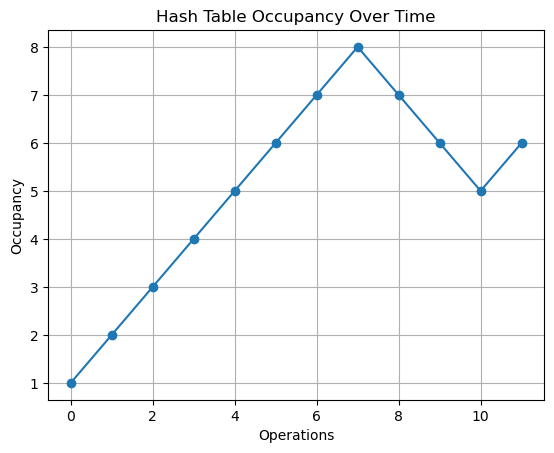

In [2]:
import time
import matplotlib.pyplot as plt

# Function to insert a record into the hash table using linear probing
def linear_probe_insert(table, key):
    index = key % len(table)
    while table[index] is not None and table[index] != 'Tombstone':
        index = (index + 1) % len(table)
    table[index] = key

# Function to mark a cell as tombstone
def mark_tombstone(table, key):
    index = key % len(table)
    while table[index] != key:
        index = (index + 1) % len(table)
    table[index] = 'Tombstone'

# Function to search for a record in the hash table
def linear_probe_search(table, key):
    index = key % len(table)
    while table[index] is not None:
        if table[index] == key:
            return True
        index = (index + 1) % len(table)
    return False

# Function to display separators
def display_separator(symbol, length):
    print(symbol * length)

# Function to print the hash table
def print_hash_table(table):
    print("╔════════════════════════╗")
    print("║     Hash Table:        ║")
    print("╠════════════════════════╣")
    for i, val in enumerate(table):
        if val is not None:
            print(f"║ {i}: {val:<20}║")
        else:
            print(f"║ {i}: {'None':<20}║")
    print("╚════════════════════════╝")

# Record start time
start_time = time.time()

# Prompt user for input to construct hash table
keys_input = input("Enter space-separated keys to construct hash table: ")
keys = list(map(int, keys_input.split()))

hash_table_size = 10
hash_table = [None] * hash_table_size

# List to store the number of occupied slots at each step
occupancy_history = []

# Insert initial records into the hash table and record occupancy
for key in keys:
    linear_probe_insert(hash_table, key)
    occupancy_history.append(sum(1 for val in hash_table if val is not None and val != 'Tombstone'))

# Print original hash table
print_hash_table(hash_table)
display_separator("*", 50)

# Prompt user for number of keys to delete
num_keys_to_delete = int(input("Enter the number of keys you want to delete: "))

# Prompt user for keys to delete
for i in range(num_keys_to_delete):
    delete_key = int(input(f"Enter key {i+1} to delete: "))
    mark_tombstone(hash_table, delete_key)
    occupancy_history.append(sum(1 for val in hash_table if val is not None and val != 'Tombstone'))

# Print hash table with tombstones for deleted keys
print_hash_table(hash_table)

# Prompt user to search for a key
search_key = int(input("Enter the key you want to search for: "))
if linear_probe_search(hash_table, search_key):
    print(f"Record {search_key} found.")
else:
    print(f"Record {search_key} not found.")
    
display_separator("*", 50)
# Prompt user for key to insert
insert_key = int(input("Enter the key you want to insert: "))
linear_probe_insert(hash_table, insert_key)
occupancy_history.append(sum(1 for val in hash_table if val is not None and val != 'Tombstone'))

# Print hash table after insertion
print_hash_table(hash_table)

# Record end time
end_time = time.time()

# Calculate and print execution time
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

# Plot the occupancy of the hash table over time
plt.plot(range(len(occupancy_history)), occupancy_history, marker='o')
plt.xlabel('Operations')
plt.ylabel('Occupancy')
plt.title('Hash Table Occupancy Over Time')
plt.grid(True)
plt.show()
